# Regression Analysis and Predictive Models Lab 
# PMDS504P

# Digital Assessment 3:Residual Analysis

## Problem Statement

You are given a dataset containing various health-related variables for 20 individuals. Your task is to analyze the relationship between Diastolic Blood Pressure (BP) and other predictor variables using simple and multiple linear regression techniques.

### Importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.api as sm 

### Loading the dataset

In [4]:
df = pd.read_excel("bloodpress.xlsx")
df.head()

,Pt,BP,Age,Weight,BSA,Duration,Pulse,Stress
0,1,105,47,85.4,1.75,5.1,63,33
1,2,115,49,94.2,2.10,3.8,70,14
2,3,116,49,95.3,1.98,8.2,72,10
3,4,117,50,94.7,2.01,5.8,73,99
4,5,112,51,89.4,1.89,7.0,72,95


In [5]:
# Extract the variables
bp = df['BP'] # Response variable
age = df['Age']
weight = df['Weight']
duration = df['Duration']

## Simple Linear Regression (Bp ~ Age)

Regression summary: BP vs Age

                            OLS Regression Results                            
Dep. Variable:                     BP   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     13.82
Date:                Thu, 13 Mar 2025   Prob (F-statistic):            0.00157
Time:                        22:11:56   Log-Likelihood:                -56.002
No. Observations:                  20   AIC:                             116.0
Df Residuals:                      18   BIC:                             118.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.4545

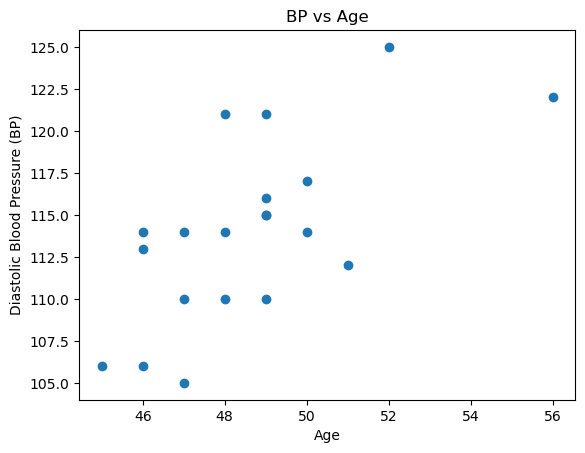

In [6]:
x_age = sm.add_constant(age)
model_age = sm.OLS(bp,x_age).fit()
print("Regression summary: BP vs Age\n")
print(model_age.summary())
plt.scatter(age,bp)
plt.xlabel("Age")
plt.ylabel("Diastolic Blood Pressure (BP)")
plt.title("BP vs Age")
plt.show()
resid_age = model_age.resid 

## Simple Linear Regression (BP ~ Weight)

Regression Summary: BP vs Weight

                            OLS Regression Results                            
Dep. Variable:                     BP   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     166.9
Date:                Thu, 13 Mar 2025   Prob (F-statistic):           1.53e-10
Time:                        22:16:43   Log-Likelihood:                -38.409
No. Observations:                  20   AIC:                             80.82
Df Residuals:                      18   BIC:                             82.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2

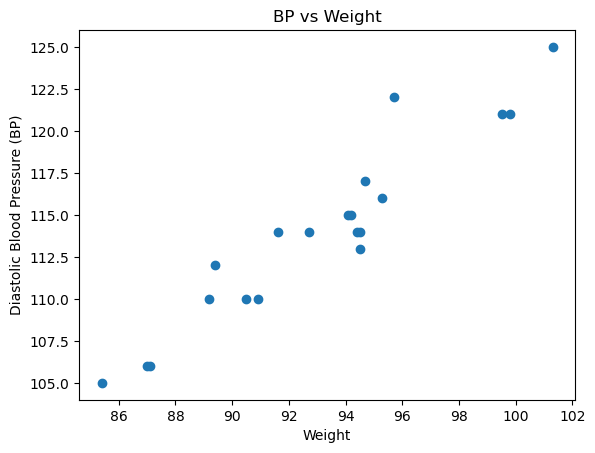

In [10]:
x_weight = sm.add_constant(weight)
model_weight = sm.OLS(bp,x_weight).fit()
print("Regression Summary: BP vs Weight\n")
print(model_weight.summary())
plt.scatter(weight, bp)
plt.xlabel("Weight")
plt.ylabel("Diastolic Blood Pressure (BP)")
plt.title("BP vs Weight")
plt.show()
resid_weight = model_weight.resid 

## Simple Linear Regression (BP ~ Duration)

Regression Summary: BP vs Duration

                            OLS Regression Results                            
Dep. Variable:                     BP   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     1.688
Date:                Thu, 13 Mar 2025   Prob (F-statistic):              0.210
Time:                        22:30:13   Log-Likelihood:                -60.804
No. Observations:                  20   AIC:                             125.6
Df Residuals:                      18   BIC:                             127.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        109

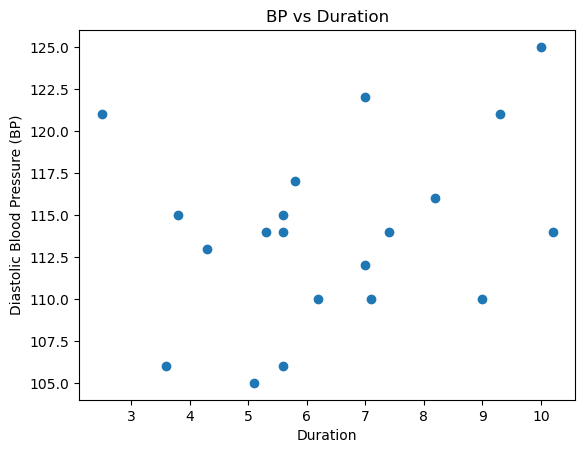

In [12]:
x_duration = sm.add_constant(duration)
model_duration = sm.OLS(bp,x_duration).fit()
print("Regression Summary: BP vs Duration\n")
print(model_duration.summary())
plt.scatter(duration, bp)
plt.xlabel("Duration")
plt.ylabel("Diastolic Blood Pressure (BP)")
plt.title("BP vs Duration")
plt.show()
resid_duration = model_duration.resid 

## Residual vs Weight plot (from BP ~ Age model)

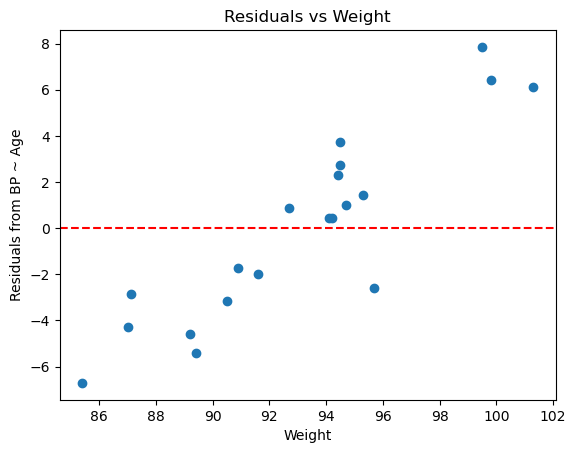

In [15]:
plt.scatter(weight,resid_age)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.xlabel('Weight')
plt.ylabel('Residuals from BP ~ Age')
plt.title('Residuals vs Weight')
plt.show()

## Multiple Linear Regression (BP ~ Age + weight)

In [17]:
x_multi = sm.add_constant(pd.DataFrame({'Age':age,'Weight':weight}))
model_multi = sm.OLS(bp,x_multi).fit()
print("Regression summary: BP vs Age + Weight\n")
print(model_multi.summary())

Regression summary: BP vs Age + Weight

                            OLS Regression Results                            
Dep. Variable:                     BP   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     978.2
Date:                Thu, 13 Mar 2025   Prob (F-statistic):           2.81e-18
Time:                        22:35:38   Log-Likelihood:                -14.157
No. Observations:                  20   AIC:                             34.31
Df Residuals:                      17   BIC:                             37.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

## Residual vs Duration plot (from BP ~ Age + weight)

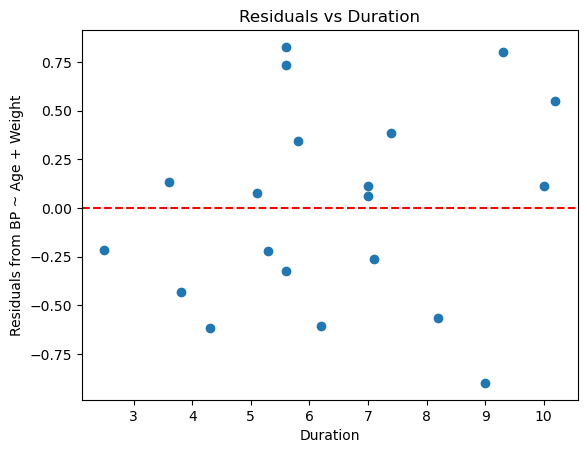

In [19]:
resid_multi = model_multi.resid 
plt.scatter(duration, resid_multi)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.xlabel("Duration")
plt.ylabel("Residuals from BP ~ Age + Weight")
plt.title("Residuals vs Duration")
plt.show()

# Interpretation & Observations

## 1. Significance of Predictor Variables
- **BP ~ Age:** Significant (p = 0.002). BP increases by 1.43 per year.
- **BP ~ Weight:** Highly significant (p = 0.000). BP increases by 1.20 per kg.
- **BP ~ Duration:** Not significant (p = 0.210). Weak relationship.
- **BP ~ Age + Weight:** Both are significant (p = 0.000). Best model.

## 2. Goodness-of-Fit (R² Value)
- **BP ~ Age:** R² = 0.434 (Moderate)
- **BP ~ Weight:** R² = 0.903 (Strong)
- **BP ~ Duration:** R² = 0.086 (Weak)
- **BP ~ Age + Weight:** R² = 0.991 (Best)

## 3. Residual Behavior and Model Improvements
- **BP ~ Age model:** Residuals plotted against Weight show a pattern, suggesting that including Weight as a predictor can improve the model.
- **BP ~ Age + Weight model:** Residuals plotted against Duration do not show a pattern, confirming that the model fits well.
- **This model can be improved by:**
  1. **Checking for multicollinearity,** as the high condition number suggests possible correlation issues.
  2. **Adding more predictors** such as BSA, Pulse, or Stress, if they contribute valuable information.
  3. **Exploring polynomial or interaction terms** to capture non-linear relationships if present.
  4. **Increasing dataset size,** which can enhance model generalization and robustness.

## Conclusion

BP is mainly influenced by Weight and Age. The best model is BP ~ Age + Weight (R² = 99.1%). Duration does not contribute significantly. This model can be refined further by checking assumptions, addressing multicollinearity, and considering additional predictors.